In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### EDA

In [2]:
spending = pd.read_csv("data/military_expenditure.csv")
spending.head()

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,Angola,AGO,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,Albania,ALB,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,Andorra,AND,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
spending['Name'].unique().shape

(264,)

## EDA

In [4]:
spending['Indicator Name'].unique().shape

(1,)

In [5]:
spending['Type'].unique()

array(['Country', 'Regions Clubbed Geographically',
       'Semi Autonomous Region', 'Regions Clubbed Economically'],
      dtype=object)

In [6]:
spending.fillna(0, inplace=True)

In [7]:
all_spending = spending[[str(year) for year in range(1960, 2019)]]
all_spending = pd.DataFrame(all_spending.apply(sum))
all_spending.rename(columns={0:'Total Global Spending'}, inplace=True)
all_spending['Total Global Spending'] =  all_spending['Total Global Spending'] / 1000000000
all_spending.head()

,Total Global Spending
1960,354.107560
1961,373.854538
1962,420.387649
1963,437.318598
1964,443.521558


In [73]:
ed = pd.read_csv("data/education_world_bank_data.csv")
ed_spending = ed[ed['Series'] == 'Government expenditure on education, US$ (millions)'].drop(
    labels=['Series', 'Series Code', 'Country Code'], axis=1).reset_index(drop=True)

In [74]:
ed_spending.head()

,Country Name,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],...,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,Afghanistan,..,20.29338,20.45676,22.78267,..,28.09369,..,..,..,...,..,551.72556,616.41405,518.42705,695.95025,757.4144,622.97168,818.72146,817.36449,..
1,Albania,..,..,..,..,..,..,..,..,..,...,..,..,..,..,452.19076,..,391.47894,469.95702,..,..
2,Algeria,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,American Samoa,..,..,..,..,7.13,9.99,9.642,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,..,..,..,..,..,..,..,..,..,...,115.48386,102.59765,108.25574,..,80.00748,100.4487,91.47684,93.70532,96.27938,..


### Visualizations

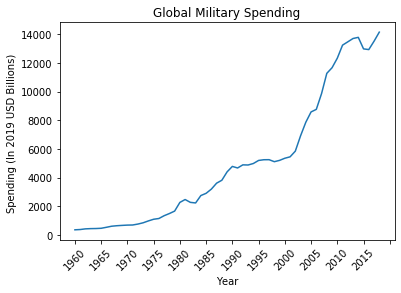

In [8]:
ax = plt.plot(all_spending)
plt.xticks(range(0,61, 5), rotation=45)
plt.title("Global Military Spending")
plt.xlabel("Year")
plt.ylabel("Spending (In 2019 USD Billions) ")
plt.show()

In [49]:
def country_graph(country_name):
    country = spending[spending['Name'] == country_name]
    country = country[[str(year) for year in range(1960, 2019)]]
    country = country.reset_index(drop=True).T.rename(columns={0:'Spending'})
    country['Spending'] = country['Spending'] / 1000000000
    
    ax = plt.plot(country)
    plt.xticks(range(0,61, 5), rotation=45)
    plt.title(country_name + " Military Spending")
    plt.xlabel("Year")
    plt.ylabel("Spending (In 2019 USD Billions) ")

    return ax

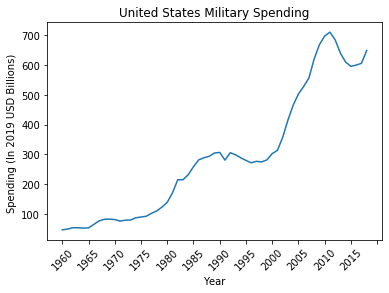

In [50]:
country_graph('United States')
plt.show()